In [1]:
# Mount Google Drive
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your file
file_path = '/content/drive/MyDrive/colabNotebooks/tesla.csv'


Mounted at /content/drive


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<ipython-input-3-f89ec889f00c>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(predicted_dates, actual_data['Close'].iloc[-len(predicted_data):], c=predicted_data, cmap='viridis', label='Predicted Movements', marker='x', vmin=0, vmax=1, edgecolors='black')


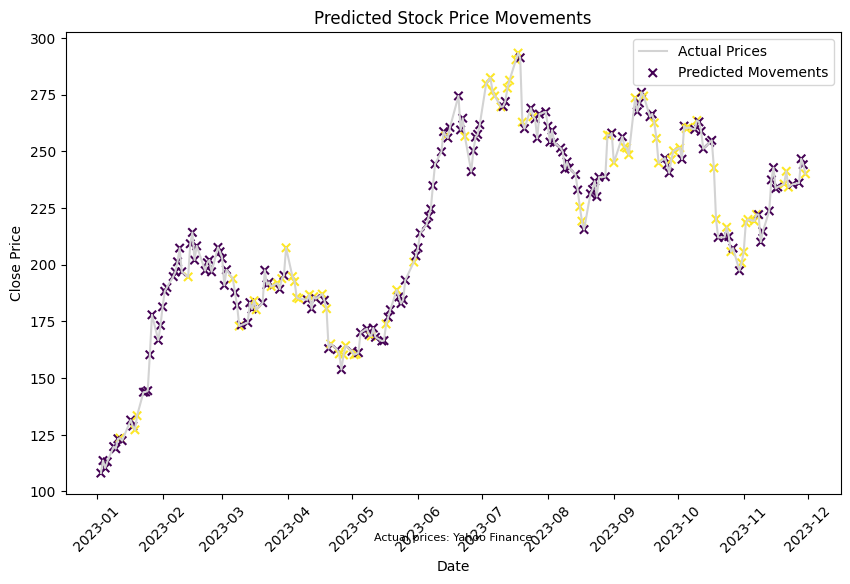

In [3]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class StockPrediction:
    def __init__(self, stock_symbol, start_date, end_date):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date

    def download_data(self):
        return yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)

    def preprocess_data(self, data):
        data['Movement'] = (data['Close'].shift(-1) > data['Close']).astype(int)
        data = data.dropna()
        return data[['Open', 'Close', 'Volume']], data['Movement']

    def train_model(self, features, labels):
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(features_scaled, labels)

        return model, scaler

    def predict(self, model, scaler, new_data):
        new_features = new_data[['Open', 'Close', 'Volume']]
        new_features_scaled = scaler.transform(new_features)
        future_predictions = model.predict(new_features_scaled)
        return future_predictions

# Define a function to plot predictions
def plot_predictions(actual_data, predicted_data):
    plt.figure(figsize=(10, 6))

    # Plot actual closing prices (lighter color)
    plt.plot(actual_data.index, actual_data['Close'], label='Actual Prices', color='lightgray')

    # Plot predicted movements (darker color)
    predicted_dates = actual_data.index[-len(predicted_data):]
    plt.scatter(predicted_dates, actual_data['Close'].iloc[-len(predicted_data):], c=predicted_data, cmap='viridis', label='Predicted Movements', marker='x', vmin=0, vmax=1, edgecolors='black')

    plt.title('Predicted Stock Price Movements')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.legend()

    # Add a text annotation with the link to Tesla's historical stock prices on Yahoo Finance
    plt.annotate('Actual prices: Yahoo Finance', xy=(0.5, -0.1), xycoords='axes fraction', ha='center',
                 fontsize=8, color='black', url='https://finance.yahoo.com/quote/TSLA/history/')

    plt.show()

if __name__ == "__main__":
    # Define stock parameters
    ticker = 'TSLA'
    start_date = '2010-06-28'
    end_date = '2020-02-02'

    # Instantiate the StockPrediction class
    stock_predictor = StockPrediction(stock_symbol=ticker, start_date=start_date, end_date=end_date)

    # Download and preprocess data
    data = stock_predictor.download_data()
    features, labels = stock_predictor.preprocess_data(data)

    # Train the model
    trained_model, trained_scaler = stock_predictor.train_model(features, labels)

    # Fetch future data for prediction
    future_start_date = '2023-01-01'
    future_end_date = '2023-12-01'
    future_data = yf.download(ticker, start=future_start_date, end=future_end_date)

    # Make predictions on future data
    future_features, _ = stock_predictor.preprocess_data(future_data)
    future_predictions = stock_predictor.predict(trained_model, trained_scaler, future_features)

    # Plot the predicted movements
    plot_predictions(future_data, future_predictions)
